In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# ECS7020P Principles of Machine Learning - Elliot Linsey QMUL

Machine Learning is defined as:
* The ability to acquire knowledge, by extracting patterns from raw data.
* A set of tools for modeling and understanding complex datasets.

Our data is always represented by a **dataset**. 

A row within this dataset corresponds to an *item*, a column corresponds to a *feature* or *attribute*. 

,Animal,BM (g),HR (bpm)
0,Wild mouse,22,480
1,White rat,237,347
2,White mouse,29,376
3,Talapoin,100,233
4,Syrian bear,250000,70


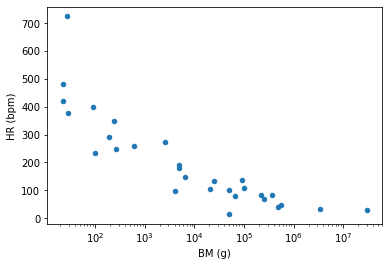

In [2]:
df = pd.read_csv('AnimalsHRvsBM.csv')
display(df.head())
df.plot.scatter(x="BM (g)", y="HR (bpm)", logx=True)
plt.show()

**Knowledge** can be represented as: 
* **Proposition** (statement, law). Smaller animals have a faster heartbeat
* **Narrative** (description, story). The size of an animal seems to be related to its heartbeat. In general, larger animals tend to have a slow heartbeat. For instance, the humpback whale... 
* **Model** (mathematical or computer). $r=235\times m^{-1/4}$, where $r$ is the heart rate and $m$ is the body mass.

We will mostly use **models** to represent knowledge. 

### ML and AI

Some AI solutions use ML algorithms, some do not. In addition, ML can be used outside the AI remit. 

Most of the time, when media and companies talk about AI, they mean ML, basic statistics or just some form of computation. 

### Deployment and Quality Assessing

Within ML, we are trying to find the best model for our data. This involves *training* our model on previous data, then assessing our model using unseen *test* data during deployment. The process of taking in data, performing transformations and normalisations, then modeling it to lead to an output or prediction is known as a *pipeline*. This pipeline is what we deploy at the end of the process. 

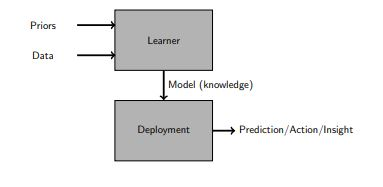

### ML Taxonomy

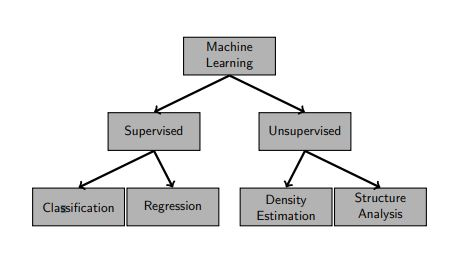

#### Supervised Learning

Within supervised learning, we already have **labelled** data that we can learn from. From this, we can predict new feature values for a new item. For example, using the animals dataset above, if presented with a new item with a body mass of 250g, we can predict a heart rate value using the existing data. This would be an example of *regression*. 

Classification: The label is a **discrete** variable. In a spam detector, an email can be labelled as 'spam' or 'not spam'. There is no in-between. 

Regression: The label is a **continuous** variable. The height of a person is a continuous variable as you can keep being more accurate, eg 180.8374... cm tall. 

#### Unsupervised Learning

Within unsupervised learning, we attempt to find the underlying structure of our data. This can be used to gain understanding, identify anomalies and clusters, compress our data and reduce processing time. 

Structure Analysis: Contains clustering and component analysis. Clustering focuses on groups of datapoints. Component analysis identifies directions of interest. 

Density estimation: provides statistical models that describe the distribution of samples in the attribute space. 

## Linear Regression

Linear regression falls under the *supervised* learning umbrella as we are using past data to predict labels for new data. These labels are *continuous*, ie numerical in value. 

$x_i$ is the predictor. 

$f(\cdot)$ is the model.

$\hat{y}_i$ is the prediction outputted from the model.

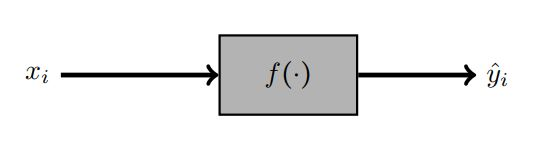

**Remember** that linear regression does not explain underlying **cause** between predictor and label. It only measures **association**. In ML we do not build causal models. A predictor and label may *appear* associated for a number of reasons: 
* One causes the other (indirectly or directly), this is not something we can determine from a linear regression, we can only determine association or correlation. 
* A third variable affects both variables (confounding variable).
* Our sampling method. 

#### Quality

To determine the quality of our regression, we use a metric called **mean squared error** or *MSE*. We can estimate an MSE ($Emse$) if provided with a model and dataset using the equation: 

$\frac{1}{N}\Sigma_{i=1}^N(y-\hat{y}_i)^2$

This just translates to the sum of every true label minus the corresponding predicted label, squared, over the number of datapoints. 

#### Quick Example

Actual vs Predicted:

43 - 41 = 2

44 - 46 = -2

38 - 32 = 6

Square and sum the errors: $2^2 + -2^2 + 6^2 = 4 + 4 + 36 = 44$

Find the mean of this sum: 44/3 (or $\frac{1}{3}\times\Sigma$ )

$Emse = 14.7$

Here's the Sklearn module and the same values.


In [3]:
from sklearn.metrics import mean_squared_error
true = np.array([43,44,38])
pred = np.array([41,46,32])
mean_squared_error(true,pred)

14.666666666666666

Error will most likely always be present within our models. We can formalise this using the equation: 

$y_i = \hat{y}_i + e_i$

Using one of the previous examples we see this is fairly straightforward: 

43 = 41 + 2

Within our regression problem, we must be aware that:
* The chosen predictor(s) may not fully encapsulate all factors that determine the label. 
* The chosen model may not be able to capture the pattern between the predictor and label.
* There may be random noise present (for example, weight can fluctuate through the day depending on what you eat which could have an effect on predicting height, depending on what time of day you were weighed). 

### Optimisation

Our goal is to find the model with the lowest $Emse$ on our dataset. However, this may not be the true **Minimum mean squared error** ($Mmse$) which we can only find during **deployment**. 

#### Simple Linear Regression

The equation for a straight line is $y = mx + c$. We use the same formula but with different symbols (and rearranged) for simple linear regression, which only has one predictor. This equation being:

$\hat{y}_i = w0 + w1x$

Here, $\hat{y}_i$ is the prediction for sample $i$.

$w0$ is the intercept. 

$w1x$ is the slope.

Both these coefficients need to be tuned to achieve the lowest $Emse$. 

Let's use a basic dataset to demonstrate the various types of linear regression. 

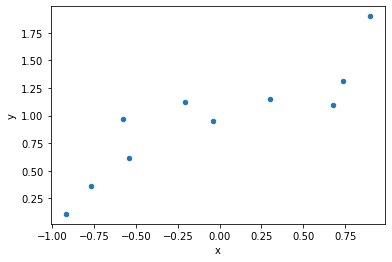

In [4]:
df2 = pd.DataFrame({
    'x': [0.3000, -0.7700, 0.9000, -0.0400, 0.7400, -0.5800, -0.9200, -0.2100, -0.5400, 0.6800],
    'y': [1.1492,  0.3582, 1.9013,  0.9487, 1.3096,  0.9646,  0.1079,  1.1262,  0.6131, 1.0951]
})
df2.plot.scatter(x='x', y='y')
plt.show()
x_train = df2['x'].to_numpy()
y_train = df2['y'].to_numpy()

#### Polyfit and Poly1d

We can use np.polyfit() to generate the least squares solution to provide the optimal $Emse$ for our x predictors and y labels. Be aware that it returns the intercept $w0$ as the last element. 

In [5]:
w = np.polyfit(x_train,y_train,1)
w

array([0.66211737, 0.98652316])

We can now use these coefficients to create a numpy polynomial object using poly1d. There are a number of attributes that this polynomial object has, such as p.c which will return the original coefficients. 

In [6]:
p = np.poly1d(w)
print("The mathematical expression of the fitted linear model is : ", p)
print("The coefficients of the model are : ", p.c)

The mathematical expression of the fitted linear model is :   
0.6621 x + 0.9865
The coefficients of the model are :  [0.66211737 0.98652316]


Using this object, we can now pass in any predictor $x$ to it and it will make a prediction. With a predictor of 0 below, it predicts y to be 0.9865 which we can confirm as it is simply the intercept value of our coefficients. We can also pass in numpy arrays, then use our MSE method from earlier.

In [7]:
print('Predicted y value when x = 0: ' + str(p(0)))
print('Predicted y values = ' + str(p(x_train)))
print('MSE = ' + str(mean_squared_error(p(x_train), y_train)))

Predicted y value when x = 0: 0.9865231644203781
Predicted y values = [1.18515838 0.47669279 1.5824288  0.96003847 1.47649002 0.60249509
 0.37737518 0.84747852 0.62897978 1.43676298]
MSE = 0.054340149160399046


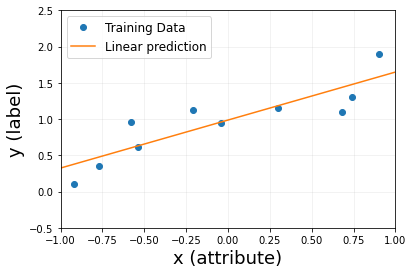

In [8]:
x_LS = np.linspace(-1,1,100).T
y_LS = p(x_LS)

plt.plot(x_train, y_train, 'o', label="Training Data")
plt.plot(x_LS, y_LS, label="Linear prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

#### Polynomial Regression

This is as simple as doing the same steps with polyfit and poly1d, but specifying how many degrees of freedom you want in the polyfit method. 

With more degrees of freedom comes more flexibility, however there is a greater risk of overfitting to your training data. With less degrees of freedom, there is a greater risk of underfitting as your model is too rigid and does not capture the underlying pattern. 

Flexible models can create more complex shapes, therefore they will always make better predictions during training. However, if they capture the training pattern too thoroughly, they may overfit and have large errors when used to test data as they have a lower ability to generalise and adapt to new data. 

In [9]:
w2 = np.polyfit(x_train, y_train, 5)
print('coefficients = ' + str(w2))

coefficients = [ 1.24458074  1.04837169  0.04529303 -0.95118004  0.12191647  1.09968234]


In [10]:
p2 = np.poly1d(w2)
print("The mathematical expression of the fitted linear model is : \n", p2)

The mathematical expression of the fitted linear model is : 
        5         4           3          2
1.245 x + 1.048 x + 0.04529 x - 0.9512 x + 0.1219 x + 1.1


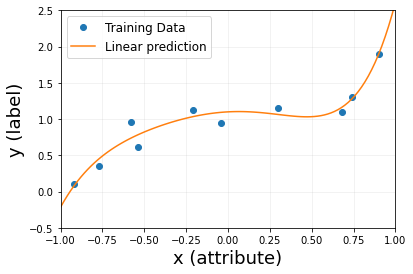

In [11]:
y_LS2 = p2(x_LS)

plt.plot(x_train, y_train, 'o', label="Training Data")
plt.plot(x_LS, y_LS2, label="Linear prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

In [12]:
print('The MSE = ' + str(mean_squared_error(p2(x_train),y_train)))

The MSE = 0.013235806168500355


Using the polynomial of degree 5 produces a curved line through our points. It also decreases the MSE in comparison to our simple linear regression model. however, the only way to tell if this is overfit would be to apply it to new data and calculate the $Emse$ using those new datapoints.

#### Custom Coefficients

If we want to generate the new values using custom coefficients, we can also use poly1d. Take the below dataset:

In [13]:
df2 = pd.DataFrame({
    'x': [2,3,1,1,0,5,4,6,5,3],
    'y': [1,2,2,1,1,3,3,7,6,5]
})
x = df2['x'].to_numpy()
y = df2['y'].to_numpy()
df2

,x,y
0,2,1
1,3,2
2,1,2
3,1,1
4,0,1
5,5,3
6,4,3
7,6,7
8,5,6
9,3,5


If we want to find the predicted values using the formula: 

$f_1(x) = 2x+1$

We can use np.poly1d to generate another numpy polynomial object. We also need to create a design matrix. Due to the way poly1d generates the coefficients we need to construct the matrix with a stack of 1s at the end. 

In [14]:
x_matrix = np.column_stack([x, np.ones(x.shape)])
x_matrix

array([[2., 1.],
       [3., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [5., 1.],
       [4., 1.],
       [6., 1.],
       [5., 1.],
       [3., 1.]])

In [15]:
p3 = np.poly1d([2,1])
print(p3)

 
2 x + 1


Multiplying them together calculates the y predicted labels.

In [16]:
x_matrix@p3

array([ 5.,  7.,  3.,  3.,  1., 11.,  9., 13., 11.,  7.])

### Multiple Linear Regression

We cannot use polyfit for multiple linear regression, due to this we must use the formal least squares formula:

$w = (X^TX)^{-1}X^Ty$

Due to the way this formula is works, we must create the X design matrix by stacking the ones at the beginning, rather than at the end.

In [17]:
df3 = pd.DataFrame({
    'age': [18,37,66,25],
    'height': [175,180,158,168],
    'salary': [12000, 68000,80000,45000]
})
df3

,age,height,salary
0,18,175,12000
1,37,180,68000
2,66,158,80000
3,25,168,45000


In [18]:
X_m2 = np.column_stack([np.ones(df3['age'].shape),df3['age'].to_numpy(),df3['height'].to_numpy()])
y3 = df3.salary.to_numpy()
X_m2

array([[  1.,  18., 175.],
       [  1.,  37., 180.],
       [  1.,  66., 158.],
       [  1.,  25., 168.]])

In [19]:
w3 = np.dot(np.dot(np.linalg.inv(np.dot(X_m2.T, X_m2)), X_m2.T), y3)
w3

array([-189295.8637292 ,    1565.318599  ,    1077.30828115])

This translates to:

$w_0 + w_1x_1 + w_2x_2$ or:

$-189295.9 + 1565.3\times x_1 + 1077.3\times x_2$

We can now feed in new x values to make predictions, remember that it must be in the form of an X design matrix with a column of ones at the beginning. Also, the equation must be in the format $X\times w$, as the predictions will be wrong if done the other way round due to matrix multiplication.

In [20]:
np.array([[1,20,180],
         [1,45,159],
         [1,36,167]])@w3

array([35925.99885763, 52435.48992862, 46966.08878677])

In [21]:
y_pred3 = X_m2@w3
y_pred3

array([27408.82025388, 62536.4150407 , 84229.87222656, 30824.89247887])

### More quality metrics

Root Mean Squared Error: Measures the sample standard deviation of the prediction error. This essentially shows how close the predictions were to the actual values, a value of 0 would indicate a perfect fit. You cannot compare RMSE values across different data types due to the different scales used. It is also sensitive to outliers as large errors have a disproportional effort on the RMSE (due to the squaring of the errors). 

$E_{RMSE} = \sqrt{\frac{1}{N}\Sigma e^2_i}$

Mean Absolute Error: Measures the average of the absolute prediction error. The use of MSE and MAE is due to the loss function required. If being off by 10 is **more than** twice as bad as being off by 5, then MSE is better. If being off by 10 is **only** twice as bad as being off by 5, then MAE is better. 

$E_{MAE}=\frac{1}{N}\Sigma|e_i|$

R-Squared: Measures the proportion of the variance in the response that is predictable from the predictors. Essentially, this tells us how much of the variance in the label is measurable from our chosen predictors. The range is from 0 to 1, if $R^2 = 0.50$ then approximately half of the observed variation can be explained by the model's inputs. 

$R^2 = 1-\frac{\Sigma e^2_i}{\Sigma(y_i - \bar{y})^2}$ where $\bar{y}$ = the mean of y.

Below I have imported the modules necessary to automatically calculate these quality metrics. The RMSE and MAE are not affected by which order you input them to the function, however the R2 score should be inputted with y_true, y_pred, else the answer changes. It would be advisable to get into the habit of using all functions and inputs in this order, to avoid any miscalculations. 

In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('RMSE = ' + str(mean_squared_error(df3.salary,y_pred3,squared=False)))
print('MAE = ' + str(mean_absolute_error(df3.salary,y_pred3)))
print('R2 = ' + str(r2_score(df3.salary,y_pred3)))

RMSE = 11023.928457138638
MAE = 9819.346240216015
R2 = 0.8190721151903064


### Underfitting and Overfitting

Underfitting: When your model does not capture the underlying pattern enough and is too general.

Overfitting: When your model memorises insignificant patterns, it will fit very well to training data but badly to test or unseen data. 

Underfitting:

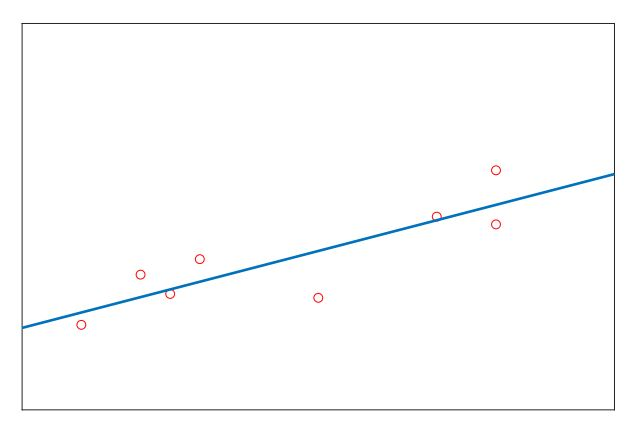

Overfitting:

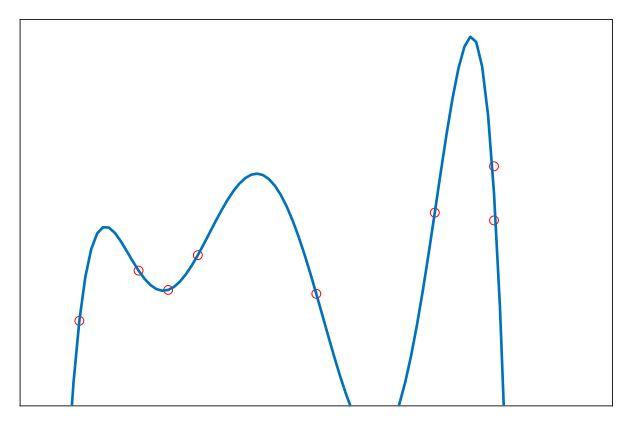

Just right

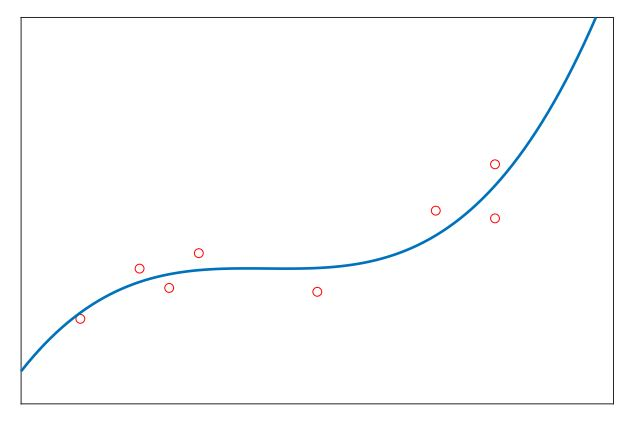

Generalisation can only be assessed by looking at how the model performs with both training and test data. 

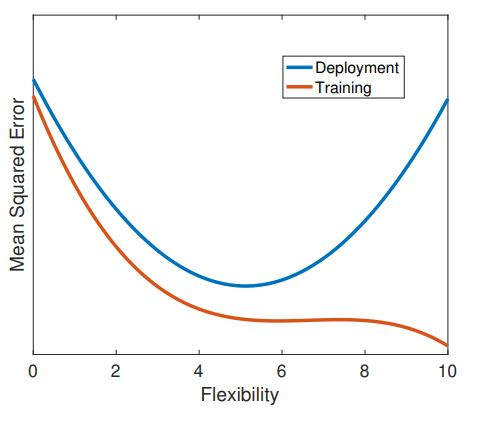

### Regularisation

A method to assess whether our model is overfitting to the training data is to use the Sum of the Squared Coefficients (**SSC**). This is simply the sum of all the *w* coefficients, the higher the sum the more likely it is that you have overfit. This is especially prevalent with polynomial regressions as there are more coefficients, therefore more scope for a higher SSC value. 

Using the *least squares* method to obtain the lowest MSE value allows the *w* coefficients to take on any value and therefore be more flexible the more polynomial degrees you have. *Regularisation* introduces a term *lambda* $\lambda$ to constrain the range of these coefficients and therefore decrease the SSC. 

A low lambda will pay more attention to reducing the MSE and a high lambda will pay more attention to reducing the SSC. 

The formula is a simple alteration to the original least squares formula:

$w = (X^TX+N\lambda I)^{-1}X^Ty$

Where *N* is the number of samples, *lambda* is the regularisation value and *I* is an identity matrix (with the same parameter as N). 

Using a dataset containing training values and test values, let's investigate how regularisation can affect the SSC and MSE.

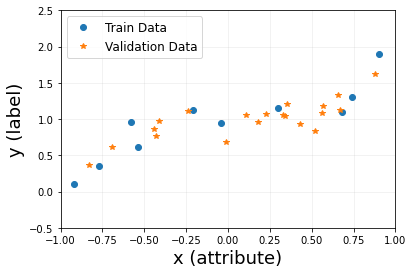

In [23]:
xTrain = np.array([0.3000, -0.7700, 0.9000, -0.0400, 0.7400, -0.5800, -0.9200, -0.2100, -0.5400, 0.6800])
yTrain = np.array([1.1492,  0.3582, 1.9013,  0.9487, 1.3096,  0.9646,  0.1079,  1.1262,  0.6131, 1.0951])
xVal = np.array([0.1100, 0.2300, 0.1800, 0.3500, 0.5200, -0.4400, -0.6900, -0.2400, 0.4300, -0.4100, 0.3300, 0.8800, -0.4300, 0.5600, 0.6600, -0.0100, -0.8300, 0.5700, 0.3400, 0.6700])
yVal = np.array([1.0569, 1.0647, 0.9575, 1.2097, 0.8371, 0.8573, 0.6128, 1.1087, 0.9253, 0.9788, 1.0590, 1.6263, 0.7660, 1.0799, 1.3341, 0.6867, 0.3657, 1.1747, 1.0440, 1.1315])
plt.plot(xTrain, yTrain, 'o', label="Train Data")
plt.plot(xVal, yVal, '*', label="Validation Data")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

Here we apply a linear model with degree 9 to demonstrate severe overfitting, we can see that there is almost 0 training error, 0.5 test error (high in comparison to the training) and a ridiculously high SSC. Applying a lambda regularisation method to this will reduce the SSC, reduce the test error but also increase the training error so that all values are hopefully low and in balance. 

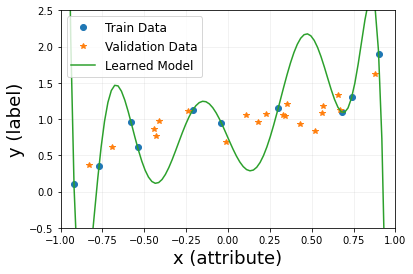

Training error: 9.506646585289594e-27
Test error: 0.5349011400613625
SSC: 1055644.074673793


In [24]:
w4 = np.polyfit(xTrain,yTrain,9)
p4 = np.poly1d(w4)
x_LS = np.linspace(-1,1,100).T
plt.plot(xTrain, yTrain, 'o', label="Train Data")
plt.plot(xVal, yVal, '*', label="Validation Data")
plt.plot(x_LS,p4(x_LS), label='Learned Model')
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

print('Training error: '+ str(mean_squared_error(yTrain,p4(xTrain))))
print('Test error: ' + str(mean_squared_error(yVal,p4(xVal))))
print('SSC: ' + str(sum(w4**2)))

To apply this regularisation method, we cannot use polyfit as that automatically generates the least squared solution for our coefficients and we want to limit our coefficients. Due to this, we have to use the formal method: 

$w = (X^TX+N\lambda I)^{-1}X^Ty$

Remember that in doing this, we have to create a design matrix with a stack of ones at the beginning and the polynomial degrees of our x values. 

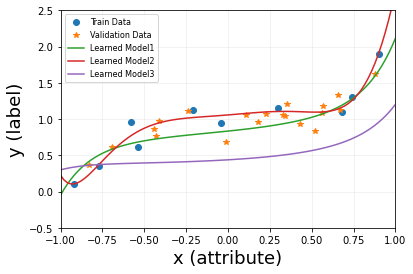

Training error 1: 0.037778556555048005
Test error 1: 0.02329138469863213
SSC 1: 0.9507613919459695

Training error 2: 0.011450285731471912
Test error 2: 0.02006028347609009
SSC 2: 16.79479600568553

Training error 3: 0.3040197839969581
Test error 3: 0.2637098544482686
SSC 3: 0.2681227787477385


In [25]:
XTrain = np.column_stack([np.ones(xTrain.shape), xTrain, xTrain**2, xTrain**3, xTrain**4, 
                          xTrain**5, xTrain**6, xTrain**7, xTrain**8, xTrain**9])
XVal = np.column_stack([np.ones(xVal.shape), xVal, xVal**2, xVal**3, xVal**4, 
                        xVal**5, xVal**6, xVal**7, xVal**8, xVal**9])
X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2, x_LS**3, x_LS**4, 
                        x_LS**5, x_LS**6, x_LS**7, x_LS**8, x_LS**9])
myLambda1 = 0.1
myLambda2 = 0.00001
myLambda3 = 1
w5 = np.dot(np.dot(np.linalg.inv(np.dot(XTrain.T, XTrain) + 10*myLambda1*np.identity(10)), XTrain.T), yTrain)
w5_2 = np.dot(np.dot(np.linalg.inv(np.dot(XTrain.T, XTrain) + 10*myLambda2*np.identity(10)), XTrain.T), yTrain)
w5_3 = np.dot(np.dot(np.linalg.inv(np.dot(XTrain.T, XTrain) + 10*myLambda3*np.identity(10)), XTrain.T), yTrain)
plt.plot(xTrain, yTrain, 'o', label="Train Data")
plt.plot(xVal, yVal, '*', label="Validation Data")
plt.plot(x_LS,X_LS@w5, label='Learned Model1')
plt.plot(x_LS,X_LS@w5_2, label='Learned Model2')
plt.plot(x_LS,X_LS@w5_3, label='Learned Model3')
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=8)
plt.show()

print('Training error 1: '+ str(mean_squared_error(yTrain,XTrain@w5)))
print('Test error 1: ' + str(mean_squared_error(yVal,XVal@w5)))
print('SSC 1: ' + str(sum(w5**2)))
print('\nTraining error 2: '+ str(mean_squared_error(yTrain,XTrain@w5_2)))
print('Test error 2: ' + str(mean_squared_error(yVal,XVal@w5_2)))
print('SSC 2: ' + str(sum(w5_2**2)))
print('\nTraining error 3: '+ str(mean_squared_error(yTrain,XTrain@w5_3)))
print('Test error 3: ' + str(mean_squared_error(yVal,XVal@w5_3)))
print('SSC 3: ' + str(sum(w5_3**2)))

As we can see changing the lambda factor changes the shape of the line we produce, as well as the error values and SSC. To select the best model we would have to go through each lambda factor and compare the scores we receive. We would also have to select the appropriate trade-off between SSC and our errors. Below is an example of lambda values we could use: 

We can also see from above that as the lambda value increases, the SSC decreases and the errors increase. As lambda gets closer to 10, the line gets closer to becoming a constant model with no flexibility.  

In [26]:
myLambdasList =[0, 10**-10, 10**-9, 10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10]

### Classification

Using coefficients and x values, we can create linear boundaries that will classify points as separate y labels. We can demonstrate this in a 2D predictor space. 

The equation $w_0 + w_1 x_1 + w_2 x_2 =0$ gives us the boundary of our linear classifier, essentially this is the equation for the line. 

The coefficients for a line with a 45 degree slope and 0 intercept are:

**w** = $[0,-1,1]$ To change the intercept we would simply change the '0' within the vector.



In [27]:
df4 = pd.DataFrame({
    'x1': [1,2,3,7,8,9],
    'x2': [7,8,9,1,2,3],
    'y': ['r','r','r','b','b','b']
})
display(df4)
x1_bin = df4['x1'].to_numpy()
x2_bin = df4['x2'].to_numpy()

,x1,x2,y
0,1,7,r
1,2,8,r
2,3,9,r
3,7,1,b
4,8,2,b
5,9,3,b


We can work through the equation $w_0 + w_1 x_1 + w_2 x_2 =0$ to rearrange the equation into a $y=mx+c$ form, just remember that in this case y is actually x2. This first example results in a line where x1 = x2 with no intercept.

\begin{eqnarray}
\boldsymbol{x}^T \boldsymbol{w} &=& [1, x_1, x_2] [0, -1, 1]^T \\
&=& 0\times 1 + (-1)\times x_1 + 1\times x_2 \\
&=& 0 - x_1 + x_2 \\ \\
\rightarrow x_2 &=& x_1 - 0.
\end{eqnarray} 

Here's another example with different coefficients: It results in a line where $x_2 = -0.43\times x_1$ with an intercept of -0.1

\begin{eqnarray}
\boldsymbol{x}^T \boldsymbol{w} &=& [1, x_1, x_2] [0.75, 3, 7]^T \\
&=& 0.75\times 1 + 3\times x_1 + 7\times x_2 \\
&=& 0.75 + 3x_1 + 7x_2 \\
7x_2&=& -0.75 - 3x_1 \\
x_2&=& \frac{-0.75 - 3x_1}{7} \\ \\
\rightarrow x_2 &=& -0.43x_1 -0.1.
\end{eqnarray} 

The way that we use this boundary is by again using $\boldsymbol{x}^T \boldsymbol{w}$. Take the boundary below, if we were to introduce the point $[5,5]$, we can work through our equation by multiplying $\boldsymbol{x}^T \boldsymbol{w}$, like so:

\begin{eqnarray}
\boldsymbol{x}^T \boldsymbol{w} &=& [1, 5, 5] [0, -1, 1]^T \\
y &=& 0\times 1 + (-1)\times 5 + 1\times 5 \\
y &=& 0 - 5 + 5 \\ \\
\rightarrow y &=& 0.
\end{eqnarray} 

In this case, the point $[5,5]$ falls exactly onto the boundary, within real data this is extremely unlikely to happen. What happens if we use the point $[7,3]$?:

\begin{eqnarray}
\boldsymbol{x}^T \boldsymbol{w} &=& [1, 7, 3] [0, -1, 1]^T \\
y &=& 0\times 1 + (-1)\times 7 + 1\times 3 \\
y &=& 0 - 7 + 3 \\ \\
\rightarrow y &=& -4.
\end{eqnarray} 

Our y value is -4, due to the fact this is a binary classifier we can establish our labels as 0 and 1. If a point falls onto our linear classifier, the y value is 0. Therefore:

- If $\boldsymbol{x}_i^T \boldsymbol{w} > 0$, then $\hat{y}_i = 1$.
- If $\boldsymbol{x}_i^T \boldsymbol{w} < 0$, then $\hat{y}_i = 0$.

In this case, our y value is less than 0, therefore our $\hat{y}_i = 0$.

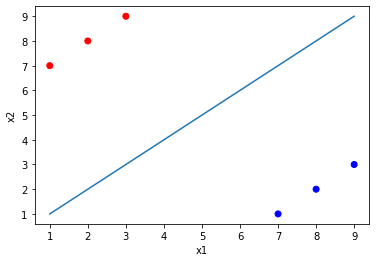

In [28]:
plt.scatter(x1_bin,x2_bin,c=df4.y)
X_bin_LS = np.linspace(1,9,100)
plt.plot(X_bin_LS,X_bin_LS)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

It is quickest to calculate these using vector multiplication. However, the $\boldsymbol{x}^T \boldsymbol{w}$ nomenclature seems slightly confusing. In fact, the only way I've managed to get these equations to work in python is to use $\boldsymbol{x} \boldsymbol{w}^T$

In [29]:
w6 = np.array([0,-1,1],ndmin=2)
x_help = np.array([[1,5,5],
                   [1,7,3]])
x_help@w6.T

array([[ 0],
       [-4]])

We can use this multiplication method with design matrices $\boldsymbol{X}$ to classify as many predictors as we would like, just remember to stack the column of ones at the beginning. We can use the trick with boolean values to automatically tell us our predicted class. We can convert boolean values to numerical values by multiplying by 1 (1*).

In [30]:
firstsample = np.array([1,4,5])
secondsample = np.array([1,7,3])

firstlabel = 1*(np.dot(firstsample,w6.T).item() > 0)
secondlabel = 1*(np.dot(secondsample,w6.T).item() > 0)

print('The predicted label of firstsample, where x1=', firstsample[1], 'and x2=', firstsample[2] ,', is ', firstlabel)
print('The predicted label of secondsample, where x1=', secondsample[1], 'and x2=', secondsample[2] ,', is ', secondlabel)

The predicted label of firstsample, where x1= 4 and x2= 5 , is  1
The predicted label of secondsample, where x1= 7 and x2= 3 , is  0


### Logistic Regression (Certainty of Classifier)

We can use logistic regression to create a notion of *certainty* when it comes to classifying points. In essence, if a point is very close to a boundary, you are less certain whether it is truly the class it has been identified as, or whether it has jumped the boundary due to random noise or variance within the data. Using $x^T_iw$ as our metric gives us the distance of our point to the boundary. Using this distance, we can calculate $p(d)$ which is the certainty that our classifier belongs to the specified class. 

The formula is: 

$$
p(d) =\frac{e^d}{e^d + 1} = \frac{1}{1 + e^{-d}}
$$

The $e$ in the formula stands for Euler's number which is $2.718...$. We can use it in python using np.exp(). However, we can just use the expit function from scipy which is the logistic sigmoid function. 

Here we plot the logistic function (or sigmoid). As we can see, if the distance of a point to the boundary is 0 (and therefore on the boundary), the classifier p(d) = 0.5 and therefore is 50% certain that it belongs to the positive class (and so 50% certain that it belongs to the negative class too). In this case, the result tells us the probability that the point belongs to the positive class, to find the probability for the negative class you simply calculate $1-p(d)$.

In [31]:
print('Using the formula for a point -4 away from the boundary: ' + str(np.exp(-4)/(np.exp(-4) + 1)))
print('Using the formula for a point 0 away from the boundary: ' + str(np.exp(0)/(np.exp(0) + 1)))

Using the formula for a point -4 away from the boundary: 0.017986209962091555
Using the formula for a point 0 away from the boundary: 0.5


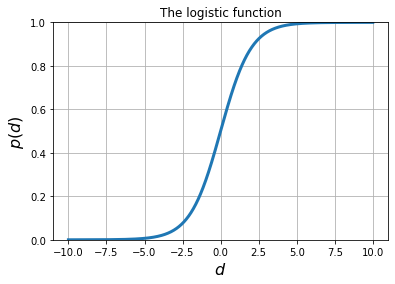

In [32]:
from scipy.special import expit

d = np.linspace(-10, 10, 1000)

plt.title("The logistic function")
plt.plot(d, expit(d), linewidth = 3)
plt.xlabel('$d$', fontsize=16)
plt.ylabel('$p(d)$', fontsize=16)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Notice that: 
- $p(d) \rightarrow 1$ as $d \rightarrow \infty$, 
- $p(0) = 0.5$, 
- $p(d) \rightarrow 0$ as $d \rightarrow -\infty$.

Past the ranges of $[-6, 6]$ the p(d) value usually reaches a saturation point of $[-\infty,\infty]$ fairly quickly.

As $x^Tw = d$ we can use $p(x^Tw)$ as our notion of certainty that a point belongs to a certain class. 

Determining the p(d) is very simple using vector notation as it is just $e^{Xw^T}$. We find that the first point is lying directly on the boundary and therefore has a certainty of 0.5 of belonging to the red class from the scatterplot above. The second point is lying further away from the boundary (-4) and therefore has a lower probability of 0.017 of belonging to the red class. 

To determine the probability of it belonging to the opposing class (in a binary problem), we simply calculate $1 - p(d)$. Which in this case would be $1-0.017=0.983$ probability that this point belongs to the **blue** class. 

In [33]:
#Defining a p(d) function
def p(X,w):
    return expit(X@w.T)

p(x_help,w6)

array([[0.5       ],
       [0.01798621]])

In [34]:
X_probs = np.column_stack([np.ones(x1_bin.shape),x1_bin,x2_bin])
certainty_1 = p(X_probs,w6)
certainty_1

array([[0.99752738],
       [0.99752738],
       [0.99752738],
       [0.00247262],
       [0.00247262],
       [0.00247262]])

Below are the certainties that the points belong to the **red** class using logistic regression. As all the points increase by 1 at the same rate as the linear boundary, all their p(d)s are the same. 

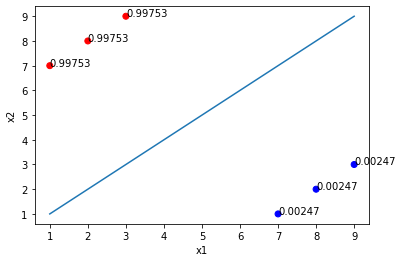

In [35]:
plt.scatter(x1_bin,x2_bin,c=df4.y)
X_bin_LS = np.linspace(1,9,100)
plt.plot(X_bin_LS,X_bin_LS)
plt.xlabel('x1')
plt.ylabel('x2')
for i, c1 in enumerate(certainty_1):
    plt.annotate(round(c1.item(),5), (x1_bin[i], x2_bin[i]))
plt.show()

We can easily reverse this process and find the p(d) for the **blue** class by using 1-p(d). As we have used vector notation this is simply coded as 1-our_p(d)_vector. Coded below as 1-certainty_1.

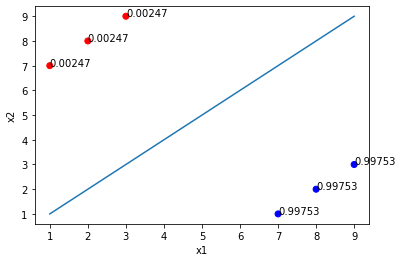

In [36]:
plt.scatter(x1_bin,x2_bin,c=df4.y)
X_bin_LS = np.linspace(1,9,100)
plt.plot(X_bin_LS,X_bin_LS)
plt.xlabel('x1')
plt.ylabel('x2')
for i, c1 in enumerate(1-certainty_1):
    plt.annotate(round(c1.item(),5), (x1_bin[i], x2_bin[i]))
plt.show()

In addition to computing the classifer's certainty for each individual sample, we can also do it for an entire dataset by simply multiplying the individual certainties. The resulting quantity $L$ is known as the **likelihood**: 

$$
L=\prod_{y_i=0}\left(1-p(\boldsymbol{x}_i^T \boldsymbol{w})\right) \prod_{y_i=1}p(\boldsymbol{x}_i^T \boldsymbol{w})
$$

The more accurate the **likelihood**, the higher the resulting number. However, as we are multiplying probabilities between 0 and 1 the number gets smaller and smaller. With too many datapoints, the number gets too small for the computer to calculate, this is why we use **negative log-likelihood**. 

As you can see, the number generated for the likelihood is very small. 

In [37]:
def likelihood(X, w, y):
  return np.prod(y*p(X, w) + (1-y)*(1-p(X, w)))

y_help = np.array([1,1,1,0,0,0],ndmin=2)
likelihood(x_help,w6,y_help)

8.609774202664566e-08

The **negative log-likelihood** is a more convenient way to quantify the classifier's certainty: 

$$
-\log L(\boldsymbol{w})=-\sum_{y_i=0}\log\left(1-p(\boldsymbol{x}_i^T \boldsymbol{w})\right) -\sum_{y_i=1}\log p(\boldsymbol{x}_i^T \boldsymbol{w})\\
= -\sum_{y_i}[(1-y_i)\log\left(1-p(\boldsymbol{x}_i^T \boldsymbol{w})\right) +y_i\log p(\boldsymbol{x}_i^T \boldsymbol{w})]
$$

As we can see, we have a more usable metric using negative log-likelihood. The **lower** the neg log-likelihood, the more certain our classifier is. 

In [38]:
def negLogLikelihood(X, w, y):
  return -np.sum(y * np.log(p(X,w)) + (1 - y) * np.log(1 - p(X,w)))

negLogLikelihood(x_help,w6,y_help)

16.267782650866536

Creating a prediction function that will class each point based on what side of the boundary they fall on. This also uses the slightly skewy $Xw^T$ version of the formula.

In [39]:
def prediction(X, w):
  return 1*(np.dot(X, w.T) > 0)

prediction(X_probs,w6)

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0]])

For our accuracy method, we are summing all the true y labels with the predicted y labels created by our boundary, then dividing by the number of datapoints. For this function to work properly, the true y labels must be formatted as a 2D transposed array to be in the same format as the output of the prediction function. 

In [40]:
def accuracy(y, yP):
  return np.sum(y==yP)/len(y)

accuracy(y_help.T, prediction(X_probs,w6))

1.0

In [41]:
y_help

array([[1, 1, 1, 0, 0, 0]])

Here are all of the functions together: 

In [42]:
#Gives the probability of the certainty of a classifier based on how far from the boundary the datapoint is
def p(X,w):
    return expit(X@w.T)

#Higher is better, but as the number is multiplying probabilities the result is extremely small.
def likelihood(X, w, y):
  return np.prod(y*p(X, w) + (1-y)*(1-p(X, w)))

#Lower is better
def negLogLikelihood(X, w, y):
  return -np.sum(y * np.log(p(X,w)) + (1 - y) * np.log(1 - p(X,w)))

#Outputs a 2D transposed array of predictions
def prediction(X, w):
  return 1*(np.dot(X, w.T) > 0)

#Requires the true y labels to be inputted as a 2D transposed array
def accuracy(y, yP):
  return np.sum(y==yP)/len(y)

### Bayes Classifier

This is another method of classifying data, however we take advantage of using **prior** information about our data to make probability predictions about the class of our unknown datapoint. 

If we choose a random sample without any prior knowledge from a population with two classes (binary), our best ability to classify this datapoint is 50%. 

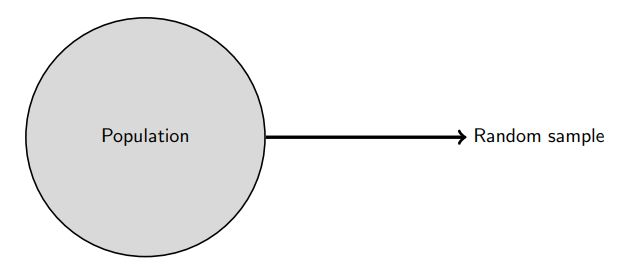

If we knew that 70% of this population were classed as red and the other 30% as blue, the best accuracy we could hope for would be 70% by classing all points as red. These would be **priors** of p(red) = 0.7 and p(blue) = 0.3.

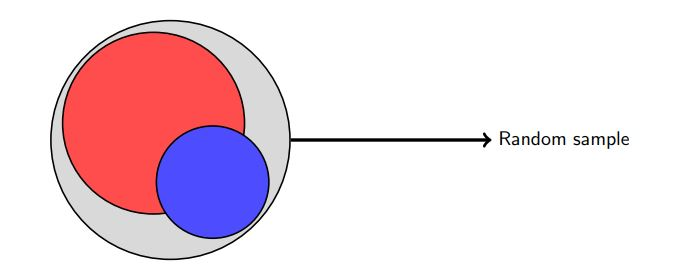

If we have another attribute $x$ that can take on two values, either $x = a$ or $x = b$ and we know the frequency of this attribute within each class, we can create **likelihoods** or **class densities** (these are both the same thing). Likelihood appears to be more commonly used in statistics and class densities in machine learning. 

If we know that: 

* Within the **red** class, the proportion of $x=a$ is 1/4 and the proportion of $x=b$ is 3/4
* Within the **blue** class, the proportion of $x=a$ is 2/3 and the proportion of $x=b$ is 1/3

The prior is calculated by: **Count of label/Number of samples** so p(red) with 70 red samples out of 100 samples total = 70/100 = 0.7

We can create class densities like: 

* p(x=a|red) = 1/4
* p(x=b|red) = 3/4
* p(x=a|blue) = 2/3
* p(x=b|blue) = 1/3

Therefore, if given a point that we know is **blue**, we would predict that $x=a$ as it has a higher **class density** than p(x=b|blue). 

#### Posterior probabilities

The classifier that obtains the highest accuracy uses **posterior probabilities**. These are the probabilities that a point belongs to a given class (red or blue) given the information that we have about the data (the **priors** and **class densities**). 

In this case, if our information about a point is that $x=a$, our posterior probabilities are (2 as we have 2 classes):

* p(red|x=a)
* p(blue|x=a)

Again, as this is a binary problem we end up with two equations using Bayes' theorem:

$p(red|x=a) = \frac{p(x=a|red) \cdot p(red)}{p(x=a)}$

To calculate $p(x=a)$ we need to sum up the probabilities that all contain $p(x=a)$, in this case these are: 

* p(x=a|red) * p(red)
* p(x=a|blue) * p(blue) 

So the full sum is $p(x=a|red) * p(red) + p(x=a|blue) * p(blue)$

If we input the previously calculated values to the formula for $p(red|x=a)$:

$p(red|x=a) = \frac{0.25 \cdot 0.7}{0.375}\\
= 0.466$

Rather than going through the whole process for $p(blue|x=a)$, we can simply do $1-p(red|x=a) = 0.533$. Due to this, if given a datapoint with $x=a$ we would assign it to **blue**, this is the same as assigning the label to the most probable class. 

As both the posterior probability equations $p(red|x=a)$ and $p(blue|x=a)$ share the same denominator when calculating them, we can instead calculate the **odds ratio** to classify a sample.

$\frac{p(red|x=a)}{p(blue|x=a)} = \frac{p(x=a|red)\cdot p(red)}{p(x=a|blue)\cdot p(blue)}\\
= 0.875$

If the result is greater than 1, the point is classified as **red**. If the point is less than 1, the point is classified as **blue**. In this case, as the result is less than 1 at 0.875, if $x=a$ then the point will be classified as **blue**, as demonstrated above as well with the result of 0.533 for $p(blue|x=a)$.

In [43]:
print('p(x=a): ' +str((1/4*0.7)+(2/3*0.3)))
print('p(red|x=a): ' + str((1/4*0.7)/0.375))
print('p(blue|x=a): ' + str((2/3*0.3)/0.375))
print('Odds ratio of posterior probabilities: ' + str((0.25*0.7)/(2/3*0.3)))

p(x=a): 0.375
p(red|x=a): 0.4666666666666666
p(blue|x=a): 0.5333333333333333
Odds ratio of posterior probabilities: 0.875


#### Bayes Summary

In essence, what we need to remember is that the **prior** is the probability of the label, i.e. the overall probability of the label. It is easy to work out, it's simply: **count of label/total number of samples**

The **class density** is calculated with these given formulas: 

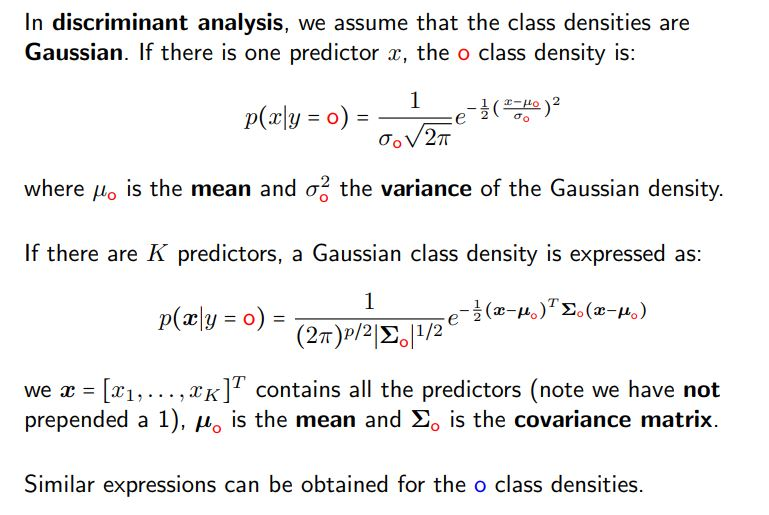

We haven't covered these properly and the class densities in this example were given to us. 

The **posterior probability** is what we are trying to find. Do not confuse it with the **class density**, this is known as the fallacy of the transposed conditional. Remember that the syntax of our posterior probability will be:

p(label|attribute), where we are finding the probability of the **label** given that we know an attribute. 

For methods such as logistic regression and KNN, we estimate the posterior probabilities. With the Bayes classifier we calculate the **true posterior probability** which should always be more accurate.

## Neural Networks

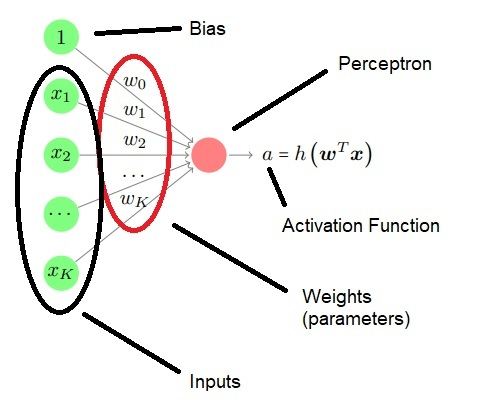

Neural networks are quite confusing (right now). 

Built up of many layers and it's very easy to get many thousands or millions of weights or parameters. This is because all the perceptrons are connected to every input (as well as every output from the previous layer of perceptrons if there is more than one layer). 

Every perceptron receives information from every input, however the weights vary from each input to perceptron. The goal of a neural network is to optimise these weights to each perceptron so that the right patterns are trained and classifications or predictions etc can be made. 

Included is also a **bias** input which can be any number depending on what the requirement is. This means that the formula for finding the number of weights is the number of perceptrons (P) * (number of inputs (L) + 1).

$N_w = P\cdot (L+1)$

An example, if we had a 16x16 grayscale pixel image, there would be 16x16 inputs = 256. It is 16x16 because that is the number of pixels within the image, if looked at as a grid you would see: 

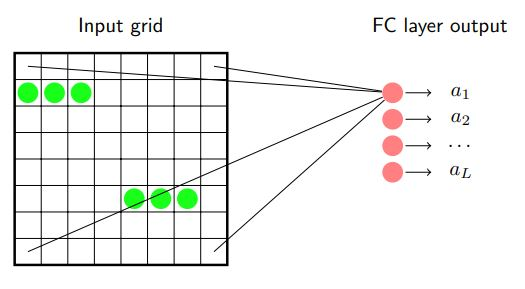

For every point on the grid, they are all connected to each perceptron. 

For a **Fully Connected Layer**, there are not necessarily the same number of perceptrons as there are locations (or inputs on the grid). In this case, with 256 perceptrons the number of weights equals: 

$256\cdot (256+1) = 65792$

Each weight is different for each input and perceptron. 

As the example is greyscale, we are only dealing with 1 value. However, if the image was RGB we would be dealing with 3 values (red, green and blue). Therefore, we would have different weights for each type of pixel and the resulting number of weights would be: 

$3\cdot (256\cdot (256+1)) = 197376$

Fully connected neural networks are more flexible as they have a higher number of parameters than convolutional neural networks (CNN) whereas CNN has weights that are defined by a filter and are shared by all perceptrons. CNN will usually have more feature maps the closer to the output we get, this is because convolutional layers process raw information into more complex concepts as the process continues, therefore we need more feature maps at the end to recognise these new concepts.  

### Convolutional Layer

This is used to filter the input and to look for patterns, specifically in fields such as audio and image recognition. 

If we take the same grid as the image above, 8x8, and apply a filter that looks at each 3x3 block within:

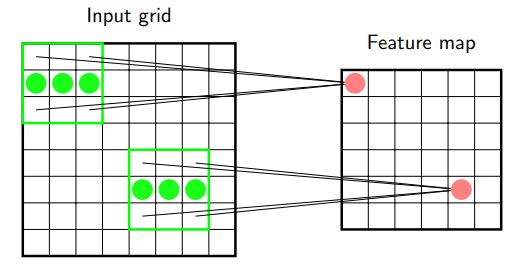

We end up with this smaller **feature map**, where each **perceptron** on the feature map corresponds to a certain pattern (such as the horizontal line) appearing in the input grid. 

**As we are looking for the same pattern, all the weights are the same for each perceptron in the feature map.** Therefore, if the convolutional layer is only looking at a 3x3 pattern within the input grid, the number of parameters (weights) is 3x3+1 (for the bias). 

Hidden layers can have a stack of feature maps looking for different patterns. If we have a stack of 2 with one looking for horizontal lines and the other looking for vertical lines, the total number of parameters is:

$2\cdot (3\times 3 + 1) = 20$

The feature map looking for horizontal lines has its own specific set of weights, the other feature map looking for vertical lines also has its own specific weights. 

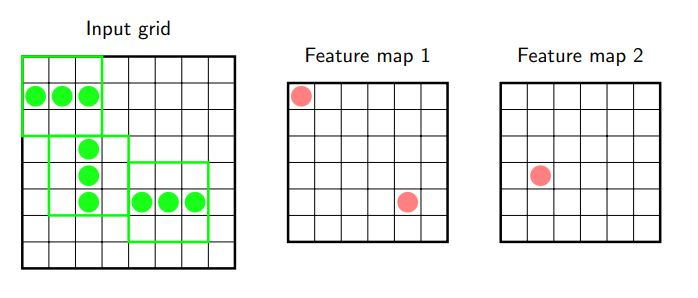

If we have several channels of input (such as with RGB images), the number of parameters is equal to (Height * Width * Depth) + 1 (bias). 

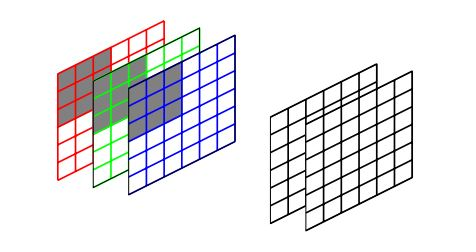

If the black grids are feature maps and the red, green and blue grids are inputs. In this case what we are looking for is still 3x3 (height and width) but we also have a **depth** of 3 (the three separate channels). Therefore, for each perceptron in our feature map, we have:

$(3\times 3\times 3) + 1 = 28$ weights or parameters. 

Remember that D relies on the number of channels being **inputted** to the kernel (filter). Therefore, even if we had 2 feature maps being used as an **input** to 8 output feature maps with a filter of 3x3 again. The resulting **depth would be 2** as we are taking input from 2 channels (previous feature maps). 

### Max Pooling

This is used to **reduce the size of feature maps**. The filter goes over a set size of the feature map, say 2x2, and returns the highest value found within the 2x2 filter grid. 

For example, if you have a feature map of 100x100 and apply max pooling of 2x2, you end up with a **new** feature map of dimension 50x50. 

You can also have an average pooling layer, which takes the average of the values in the filter rather than the max. 

Also, these layers do not need to be trained as there are no weights and it is only making calculations on existing data. 

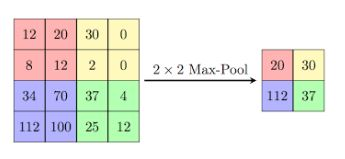

All these layers (fully connected, convolutional, max pooling) can be connected within one neural network: 

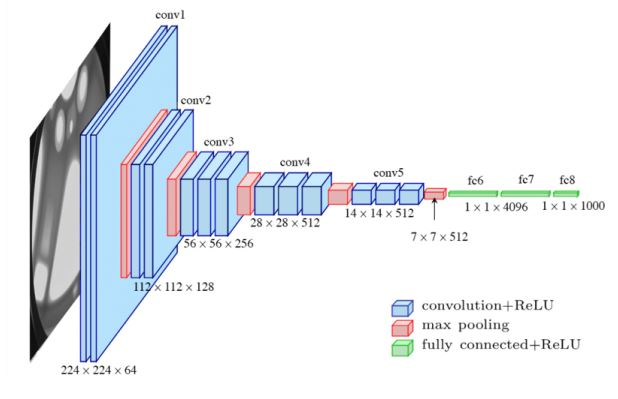

This network was trained on a dataset with images that have 1000 classes. VGG16 has 16 layers, 3×3 kernels and 138 million weights.